# Q1.1 — Model Choice and Justification

I chose Linear Regression using the Statsmodels library to perform Cook's Distance outlier detection. Linear Regression is the best choice because Cook's Distance is specifically designed for ordinary least squares models and works directly with residuals and leverage values from a standard linear regression. Since our goal is to identify outliers and not to do regularization or feature selection, using Ridge or Lasso is unnecessary and would make the results harder to interpret. I used Statsmodels instead of scikit-learn because Statsmodels has built-in tools to calculate Cook's Distance, which makes the process simpler.

# Q1.2 — Identify outliers, remove them, and export clean CSV (15 points)


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("usina_with_outliers.csv")


X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True
)

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()


influence = model.get_influence()
cooks_d, _ = influence.cooks_distance


n = X_train_const.shape[0]
threshold = 4 / n

outlier_mask = cooks_d > threshold


X_train_clean = X_train.loc[~outlier_mask]
y_train_clean = y_train.loc[~outlier_mask]


clean_df = pd.concat([X_train_clean, y_train_clean], axis=1)


clean_df.to_csv("usina.csv", index=False)

print(f"Originalsamples: {len(X_train)}")
print(f"Removed outliers: {outlier_mask.sum()}")
print(f"Clean samples: {len(clean_df)}")


Originalsamples: 6697
Removed outliers: 85
Clean samples: 6612


# Q2 (20 points): Train/Test Evaluation Before vs After Outlier Removal

In [4]:
def evaluate_models(X, y, dataset_name):
    print(f"\n==============================")
    print(f"Results for {dataset_name}")
    print(f"==============================")

    # Train/Test split (70/30)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=42, shuffle=True
    )

    lambdas = [0.01, 0.1, 1, 10, 100]

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    print("\nLinear Regression")
    print("------------------------------")
    print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
    print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
    print(f"Train R²:  {r2_score(y_train, y_train_pred):.3f}")
    print(f"Test  MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
    print(f"Test  MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
    print(f"Test  R²:  {r2_score(y_test, y_test_pred):.3f}")

    #Ridge & Lasso
    for lam in lambdas:
        # Ridge
        ridge = Ridge(alpha=lam)
        ridge.fit(X_train, y_train)

        y_train_pred = ridge.predict(X_train)
        y_test_pred = ridge.predict(X_test)

        print(f"\nRidge Regression (λ = {lam})")
        print("------------------------------")
        print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
        print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
        print(f"Train R²:  {r2_score(y_train, y_train_pred):.3f}")
        print(f"Test  MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
        print(f"Test  MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
        print(f"Test  R²:  {r2_score(y_test, y_test_pred):.3f}")

        # Lasso
        lasso = Lasso(alpha=lam, max_iter=10000)
        lasso.fit(X_train, y_train)

        y_train_pred = lasso.predict(X_train)
        y_test_pred = lasso.predict(X_test)

        print(f"\nLasso Regression (λ = {lam})")
        print("------------------------------")
        print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
        print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
        print(f"Train R²:  {r2_score(y_train, y_train_pred):.3f}")
        print(f"Test  MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
        print(f"Test  MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
        print(f"Test  R²:  {r2_score(y_test, y_test_pred):.3f}")

# With outliers
df_outliers = pd.read_csv("usina_with_outliers.csv")

X_outliers = df_outliers[["AT", "V", "AP", "RH"]]
y_outliers = df_outliers["PE"]

evaluate_models(X_outliers, y_outliers, "Dataset WITH Outliers")

#Without Outliers
df_clean = pd.read_csv("usina.csv")

X_clean = df_clean[["AT", "V", "AP", "RH"]]
y_clean = df_clean["PE"]

evaluate_models(X_clean, y_clean, "Dataset AFTER Outlier Removal")


Results for Dataset WITH Outliers

Linear Regression
------------------------------
Train MAE: 5.199
Train MSE: 123.384
Train R²:  0.650
Test  MAE: 5.052
Test  MSE: 125.113
Test  R²:  0.643

Ridge Regression (λ = 0.01)
------------------------------
Train MAE: 5.199
Train MSE: 123.384
Train R²:  0.650
Test  MAE: 5.052
Test  MSE: 125.113
Test  R²:  0.643

Lasso Regression (λ = 0.01)
------------------------------
Train MAE: 5.199
Train MSE: 123.384
Train R²:  0.650
Test  MAE: 5.053
Test  MSE: 125.115
Test  R²:  0.643

Ridge Regression (λ = 0.1)
------------------------------
Train MAE: 5.199
Train MSE: 123.384
Train R²:  0.650
Test  MAE: 5.052
Test  MSE: 125.113
Test  R²:  0.643

Lasso Regression (λ = 0.1)
------------------------------
Train MAE: 5.202
Train MSE: 123.385
Train R²:  0.650
Test  MAE: 5.055
Test  MSE: 125.134
Test  R²:  0.643

Ridge Regression (λ = 1)
------------------------------
Train MAE: 5.199
Train MSE: 123.384
Train R²:  0.650
Test  MAE: 5.052
Test  MSE: 125.113
T

Discussion for Q2:

From the results, outliers have a large impact on both train and test performance. When outliers are present, the errors are much higher, like the Train/Test MSE being 123 to 125 and R² ≈ 0.65, showing that the model struggles to fit the data well. After removing outliers, both train and test errors drop significantly, with Train/Test MSE being 19 to 20 and R² ≈ 0.93, indicating a much better fit. The train and test metrics are also very close to each other after outlier removal, which suggests improved generalization and less influence from extreme data points. Overall, the dataset without outliers clearly generalizes better than the dataset with outliers.

Ridge and Lasso regression do not provide noticeable improvements over standard linear regression for small lambda values in either dataset, as their performance is nearly identical to linear regression. This suggests that the features are already well-behaved and not heavily overfitting. However, for large λ values, especially with Lasso λ = 10 and 100, performance drops significantly, with much higher errors and lower R² values, indicating underfitting.


# Q3 (20 points): Reliability of Coefficients

Q3.1 — Method choice and scaling decision (10 points)

I chose Linear Regression using Statsmodels OLS to analyze coefficient reliability. Linear Regression is the most appropriate model because the goal of this question is not prediction accuracy or regularization, but rather interpreting and comparing regression coefficients. Ridge and Lasso shrink coefficients and introduce bias, which makes it harder to judge the natural reliability of each feature's effect on the target variable. Since we want to assess how stable and statistically meaningful each coefficient is, ordinary least squares is the best choice. I chose Statsmodels instead of scikit-learn because Statsmodels provides statistical inference tools, including standard errors, t-statistics, and p-values for each coefficient. These outputs are essential for evaluating coefficient reliability. Scikit-learn focuses on prediction and does not provide p-values or confidence intervals by default. We do not scale the independent variables or the target variable. Scaling would change the interpretation of coefficient magnitudes and standard errors, making it harder to relate reliability back to the original physical meaning of the features.

In [5]:
import statsmodels.api as sm

df = pd.read_csv("usina.csv")

X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.261e+04
Date:                Tue, 27 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:43:42   Log-Likelihood:                -19229.
No. Observations:                6612   AIC:                         3.847e+04
Df Residuals:                    6607   BIC:                         3.850e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.1256     11.444     39.594      0.000     430.691     475.560
AT            -1.9882      0.018   -111.007      0.000      -2.023      -1.953
V             -0.2305      0.008    -27.146      0.000      -0.247      -0.214
AP             0.0632      0.011      5.689      0.000       0.041       0.085
RH            -0.1528      0.005    -32.021      0.000      -0.162      -0.143
==============================================================================
Omnibus:                       36.513   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.307
Skew:                           0.018   Prob(JB):                     4.38e-12
Kurtosis:                       3.434   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Discussion:

Based on the OLS regression results, Ambient Temperature is the most reliable coefficient, while Ambient Pressure is the least reliable among the predictors. AT has by far the largest absolute t-statistic t 111.007 and a very small standard error of 0.018, indicating a strong, stable, and highly significant relationship with power output. Its confidence interval is also tight, showing little uncertainty in the estimate. In contrast, AP has the smallest absolute t-statistic t 5.689 and a comparatively larger standard error relative to its coefficient magnitude, meaning its estimated effect on power output is weaker and less precise than the other variables.

# Q4 (20 points): Most Important vs Least Important Features (Use Outlier-Removed Dataset)

Q4.1 — Method choice and scaling decision (10 points)

I chose Linear Regression using scikit-learn to determine feature importance. Linear Regression is appropriate because feature importance in a linear model can be directly interpreted from the magnitude of the coefficients when all features are on the same scale. I did not choose Ridge or Lasso because regularization shrinks coefficients and can distort their relative sizes, which makes direct comparison of feature importance less clear. I used scikit-learn instead of Statsmodels because scikit-learn is commonly used for feature importance analysis based on coefficient magnitude. For this task, I scale the independent variables but not the dependent variable. Scaling the IVs is important because the features are measured in different units.

In [9]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("usina.csv")

X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.Series(
    model.coef_,
    index=["AT", "V", "AP", "RH"]
)

coefficients

,0
AT,-14.551011
V,-3.064942
AP,0.382098
RH,-2.163793


Discussion:
Based on the standardized coefficient results, Ambient Temperature is the most important feature, while Ambient Pressure is the least important feature. After scaling the independent variables, feature importance can be compared directly using the absolute values of the coefficients. AT has by far the largest magnitude coefficient at 14.55, indicating that changes in ambient temperature have the strongest impact on power output. In contrast, AP has the smallest magnitude coefficient at 0.38, meaning it contributes the least to the model's predictions once all features are placed on the same scale. The remaining variables, V and RH, fall in between, with moderate influence relative to AT.

# Q5 (15 points): Regularization Paths (Scaled Data, Outlier-Removed Dataset)




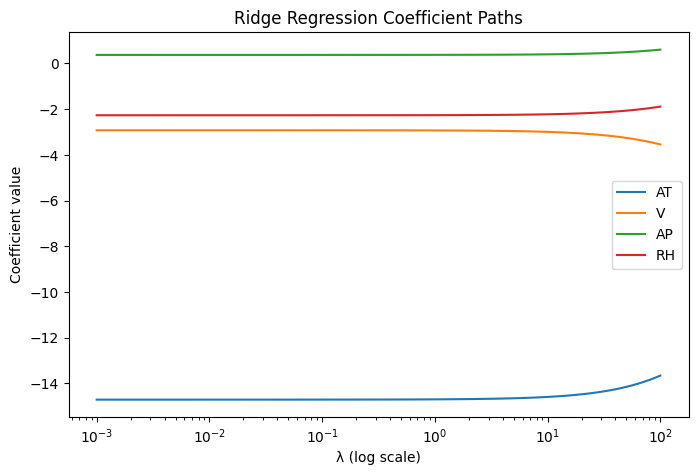

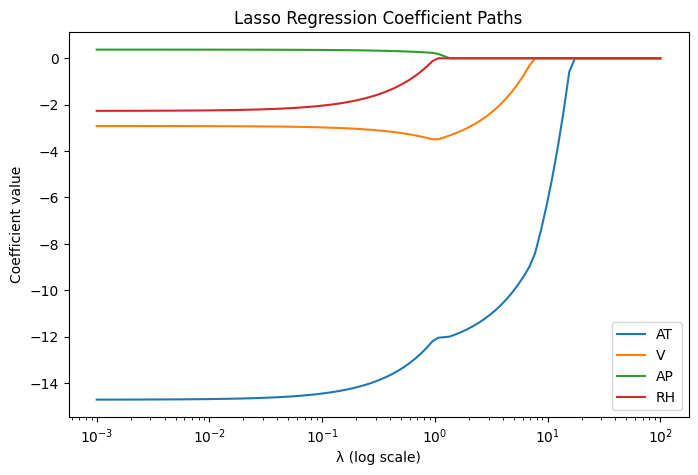

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv("usina.csv")

X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

feature_names = ["AT", "V", "AP", "RH"]

lambdas = np.logspace(-3, 2, 100)  # from 0.001 to 100

ridge_coefs = []
lasso_coefs = []

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_scaled, y)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(8, 5))
for i, feature in enumerate(feature_names):
    plt.plot(lambdas, ridge_coefs[:, i], label=feature)

plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Coefficient value")
plt.title("Ridge Regression Coefficient Paths")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
for i, feature in enumerate(feature_names):
    plt.plot(lambdas, lasso_coefs[:, i], label=feature)

plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Coefficient value")
plt.title("Lasso Regression Coefficient Paths")
plt.legend()
plt.show()


Discussion:

In the Ridge regression plot, the coefficient paths are relatively stable across the entire range of lambda values and do not move close to zero. Even as lambda increases, the coefficients only shrink slightly and remain non-zero, especially for the most important feature AT. This shows that Ridge applies smooth shrinkage and tends to preserve all features rather than forcing them out of the model. Ridge is effective at handling multicollinearity by reducing variance while keeping correlated predictors in the model. In contrast, the Lasso regression plot shows that coefficients shrink much more aggressively as lambda increases. Several coefficients, such as AP, V, and RH, are driven exactly to zero at moderate lambda values, while AT remains non-zero for longer before also shrinking. This confirms that Lasso performs feature selection by completely eliminating less important features. Ridge maintains stable, non-zero coefficients and is better for multicollinearity, while Lasso is better for feature selection due to its ability to zero out coefficients.